#Student Academic Performance Analysis and CGPA Prediction

## 1. Introduction

Academic performance is influenced by various factors, including prior academic achievement, study habits, learning behavior, and demographic background. Understanding how these factors relate to students' academic outcomes can help educators and institutions provide better academic support.

This project aims to explore a real-world student performance dataset and analyze how different academic and behavioral features relate to students' current CGPA. Additionally, a baseline predictive model is developed to estimate CGPA using available student information.


## 2. Problem Statement

The main objectives of this project are:
- To explore and understand the distribution of academic and behavioral features among students.
- To identify which factors are most strongly associated with students' current CGPA.
- To build a baseline regression model to predict students' CGPA using available data.


## 3. Data Preparation

Before analysis, the dataset was inspected for missing values, data types, and basic statistical properties. One missing value was found in the skills-related column and was handled by filling it with an "Unknown" category. Categorical variables were encoded using one-hot encoding for modeling purposes.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
  df=pd.read_excel('Students_Performance_data_set.xlsx')

  print('Dataset Imported Successfully')
except FileNotFoundError:
  print('One or more files not found. Check the file path')
except Exception as e:
  print(f'An error occured: {e}')

df.head()

Dataset Imported Successfully


,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,...,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,...,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


In [22]:
# Shape of Dataset
print('Shape:', df.shape)

# Information each columns
df.info()

# Basic Statistics
df.describe()

Shape: (1194, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   University Admission year                                                  1194 non-null   int64  
 1   Gender                                                                     1194 non-null   object 
 2   Age                                                                        1194 non-null   int64  
 3   H.S.C passing year                                                         1194 non-null   int64  
 4   Program                                                                    1194 non-null   object 
 5   Current Semester                                                           1194 non-null   int64  
 6   Do you have meritorious scholarship ? 

,University Admission year,Age,H.S.C passing year,Current Semester,How many hour do you study daily?,How many times do you seat for study in a day?,How many hour do you spent daily in social media?,How many hour do you spent daily on your skill development?,What was your previous SGPA?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1.194000e+03
mean,2020.515075,21.343384,2019.214405,6.539363,3.131491,1.940536,3.289782,2.185092,2.683946,3.165600,71.842546,6.248812e+04
std,1.354954,1.613338,1.380960,3.809884,1.649597,0.856305,2.289547,1.296101,0.871589,0.750127,48.074338,7.617356e+04
min,2013.000000,18.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
25%,2020.000000,20.000000,2019.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.200000,2.900000,23.000000,3.000000e+04
50%,2021.000000,21.000000,2020.000000,7.000000,3.000000,2.000000,3.000000,2.000000,2.680000,3.210000,78.000000,5.000000e+04
75%,2022.000000,22.000000,2020.000000,10.000000,4.000000,2.000000,4.000000,3.000000,3.380000,3.670000,117.000000,7.400000e+04
max,2023.000000,27.000000,2028.000000,24.000000,13.000000,7.000000,20.000000,12.000000,4.000000,4.000000,145.000000,2.000000e+06


In [23]:
# Check missing value
df.isnull().sum()

,0
University Admission year,0
Gender,0
Age,0
H.S.C passing year,0
Program,0
Current Semester,0
Do you have meritorious scholarship ?,0
Do you use University transportation?,0
How many hour do you study daily?,0
How many times do you seat for study in a day?,0


## 4. Exploratory Data Analysis (EDA)

Exploratory data analysis was conducted to understand the distribution and relationships of key variables. Histograms were used to analyze numerical distributions, while boxplots and scatter plots were employed to explore relationships between categorical and numerical variables.


In [24]:
# Handling missing value
df['What are the skills do you have ?'] = df['What are the skills do you have ?'].fillna('Unknown')

<function matplotlib.pyplot.show(close=None, block=None)>

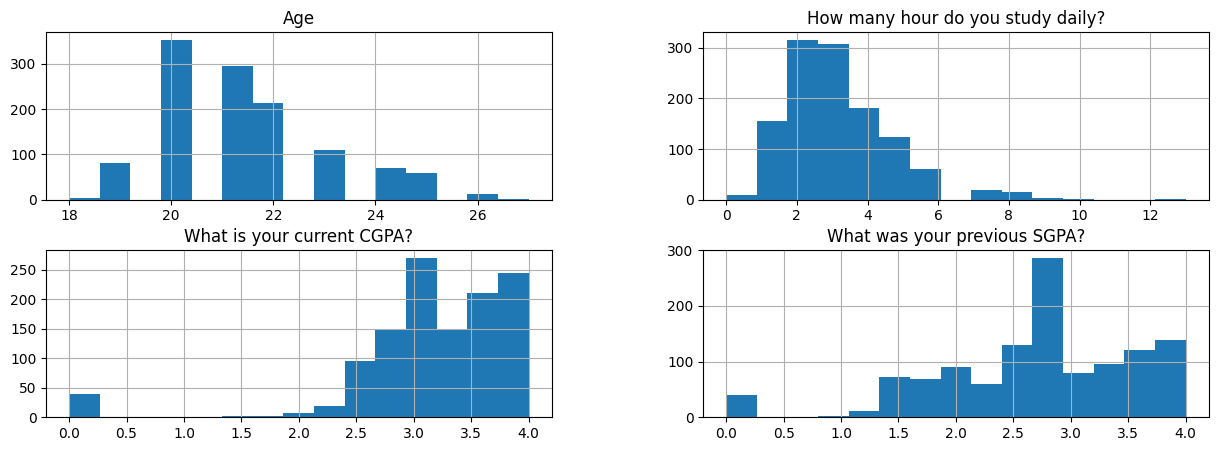

In [25]:
# Histogram some numeric columns
numeric_cols = ['Age','How many hour do you study daily?','What is your current CGPA?','What was your previous SGPA?','Average attendance on class']
df[numeric_cols].hist(bins=15, figsize=(15, 5))
plt.show

**Histogram Numeric**

**Age** : Positive skewness, Age mungkin tidak terlalu pengaruh ke CGPA karena variannya kecil.

**How many hours do you study daily?** : Positive skew, belajar lebih lama tidak otomatis CGPA lebih tinggi (kita lihat di scatter plot nanti).

**Current CGPA** : Negative skew, Data CGPA tidak simetris, kemungkinan ada beberapa siswa gagal / outlier rendah → penting di cleaning/outlier detection.

**Previous SGPA** : Distribusi hampir mendatar, satu dominan, negative skew → sebagian besar SGPA tinggi, minoritas rendah.

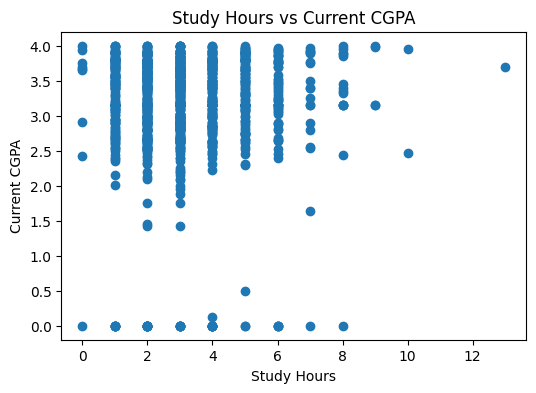

In [26]:
# Scatter plot Study Hours vs Current CGPA
plt.figure(figsize=(6,4))
plt.scatter(df['How many hour do you study daily?'],df['What is your current CGPA?'])
plt.xlabel('Study Hours')
plt.ylabel('Current CGPA')
plt.title('Study Hours vs Current CGPA')
plt.show()

Study Hours saja tidak cukup prediktor CGPA, perlu kombinasi faktor lain (attendance, motivation, skills, previous SGPA, dll).

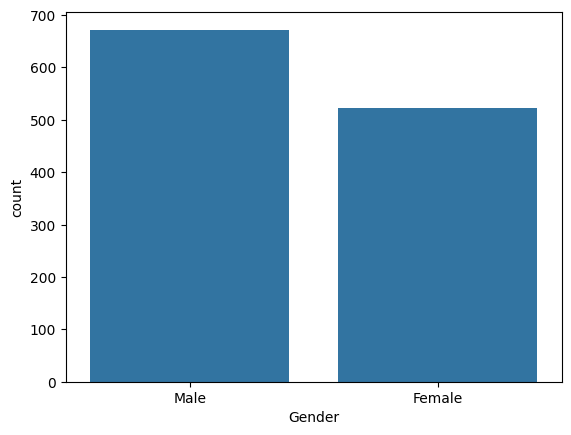

In [27]:
# Frequency for Gender category
sns.countplot(data=df, x='Gender')
plt.show()

Male lebih dominan, selisih ~120 → cukup seimbang untuk analisis, tapi perlu diingat kalau nanti kita mau group comparison (CGPA laki-laki vs perempuan).

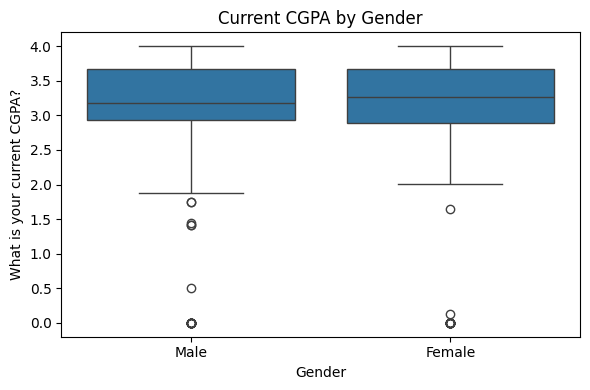

In [28]:
# Boxplot Current CGPA vs Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='What is your current CGPA?', data=df)
plt.title('Current CGPA by Gender')
plt.tight_layout()
plt.show()

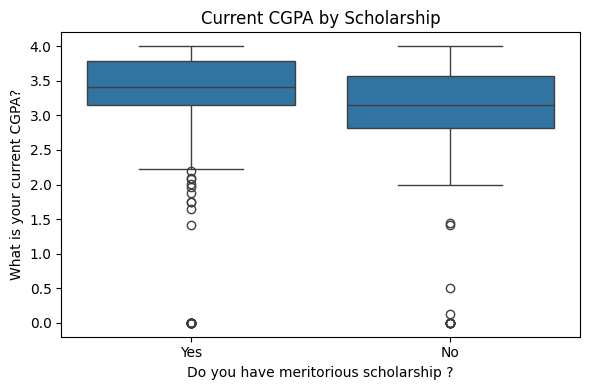

In [29]:
# Boxplot Current CGPA vs Scholarship
plt.figure(figsize=(6,4))
sns.boxplot(x='Do you have meritorious scholarship ?', y='What is your current CGPA?', data=df)
plt.title('Current CGPA by Scholarship')
plt.tight_layout()
plt.show()

Students who receive meritorious scholarships tend to have higher median and overall CGPA compared to non-scholarship students. However, outliers with low CGPA exist in both groups, indicating that scholarship status alone does not guarantee academic success.

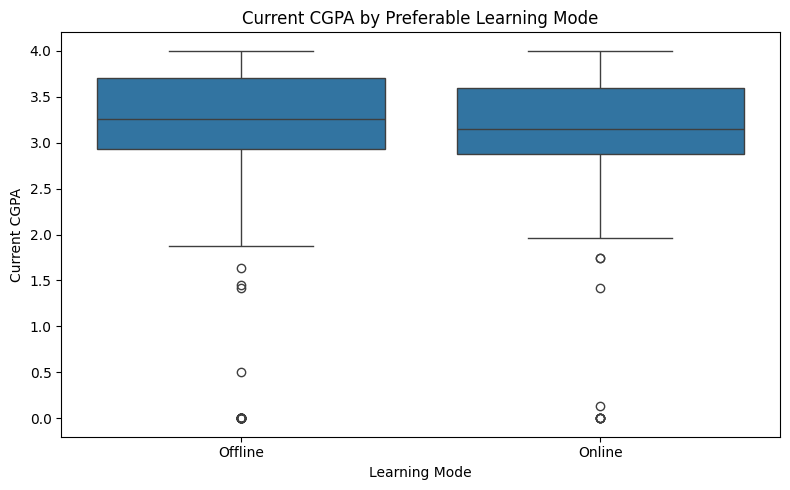

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='What is your preferable learning mode?',
    y='What is your current CGPA?',
    data=df
)
plt.title('Current CGPA by Preferable Learning Mode')
plt.xlabel('Learning Mode')
plt.ylabel('Current CGPA')
plt.tight_layout()
plt.show()

In [31]:
df.groupby('What is your preferable learning mode?')['What is your current CGPA?'].describe()

,count,mean,std,min,25%,50%,75%,max
What is your preferable learning mode?,,,,,,,,
Offline,858.0,3.174516,0.785659,0.0,2.9325,3.26,3.70,4.0
Online,336.0,3.142831,0.651187,0.0,2.8800,3.15,3.59,4.0


Offline learning shows a slightly higher median CGPA but also greater variability, while online learning results in more consistent outcomes with slightly lower performance. The overlap in distributions indicates that learning mode alone does not strongly determine academic success.

## 5. Feature Analysis

Correlation analysis was performed to identify numerical features most strongly associated with current CGPA. Previous academic performance (Previous SGPA) showed the strongest positive correlation, while behavioral variables such as study hours and social media usage exhibited weak correlations.


In [32]:
numeric_cols = [
    'Age',
    'How many hour do you study daily?',
    'How many times do you seat for study in a day?',
    'How many hour do you spent daily in social media?',
    'How many hour do you spent daily on your skill development?',
    'What was your previous SGPA?',
    'How many Credit did you have completed?',
    'What is your monthly family income?',
    'What is your current CGPA?'
]

df_numeric = df[numeric_cols]

# Correlation matrix
corr = df_numeric.corr()
corr

,Age,How many hour do you study daily?,How many times do you seat for study in a day?,How many hour do you spent daily in social media?,How many hour do you spent daily on your skill development?,What was your previous SGPA?,How many Credit did you have completed?,What is your monthly family income?,What is your current CGPA?
Age,1.000000,-0.012256,0.018433,0.020693,0.121907,0.020770,0.476374,0.028034,0.066038
How many hour do you study daily?,-0.012256,1.000000,0.374046,0.016313,0.137195,0.043621,-0.006609,-0.000492,0.023690
How many times do you seat for study in a day?,0.018433,0.374046,1.000000,-0.063458,0.126989,0.007952,0.061102,0.036434,0.048802
How many hour do you spent daily in social media?,0.020693,0.016313,-0.063458,1.000000,-0.034756,-0.178531,0.106239,0.053967,-0.052879
How many hour do you spent daily on your skill development?,0.121907,0.137195,0.126989,-0.034756,1.000000,0.003065,0.185845,0.011152,0.083224
What was your previous SGPA?,0.020770,0.043621,0.007952,-0.178531,0.003065,1.000000,-0.126093,-0.121872,0.755055
How many Credit did you have completed?,0.476374,-0.006609,0.061102,0.106239,0.185845,-0.126093,1.000000,0.165812,0.222052
What is your monthly family income?,0.028034,-0.000492,0.036434,0.053967,0.011152,-0.121872,0.165812,1.000000,-0.000273
What is your current CGPA?,0.066038,0.023690,0.048802,-0.052879,0.083224,0.755055,0.222052,-0.000273,1.000000


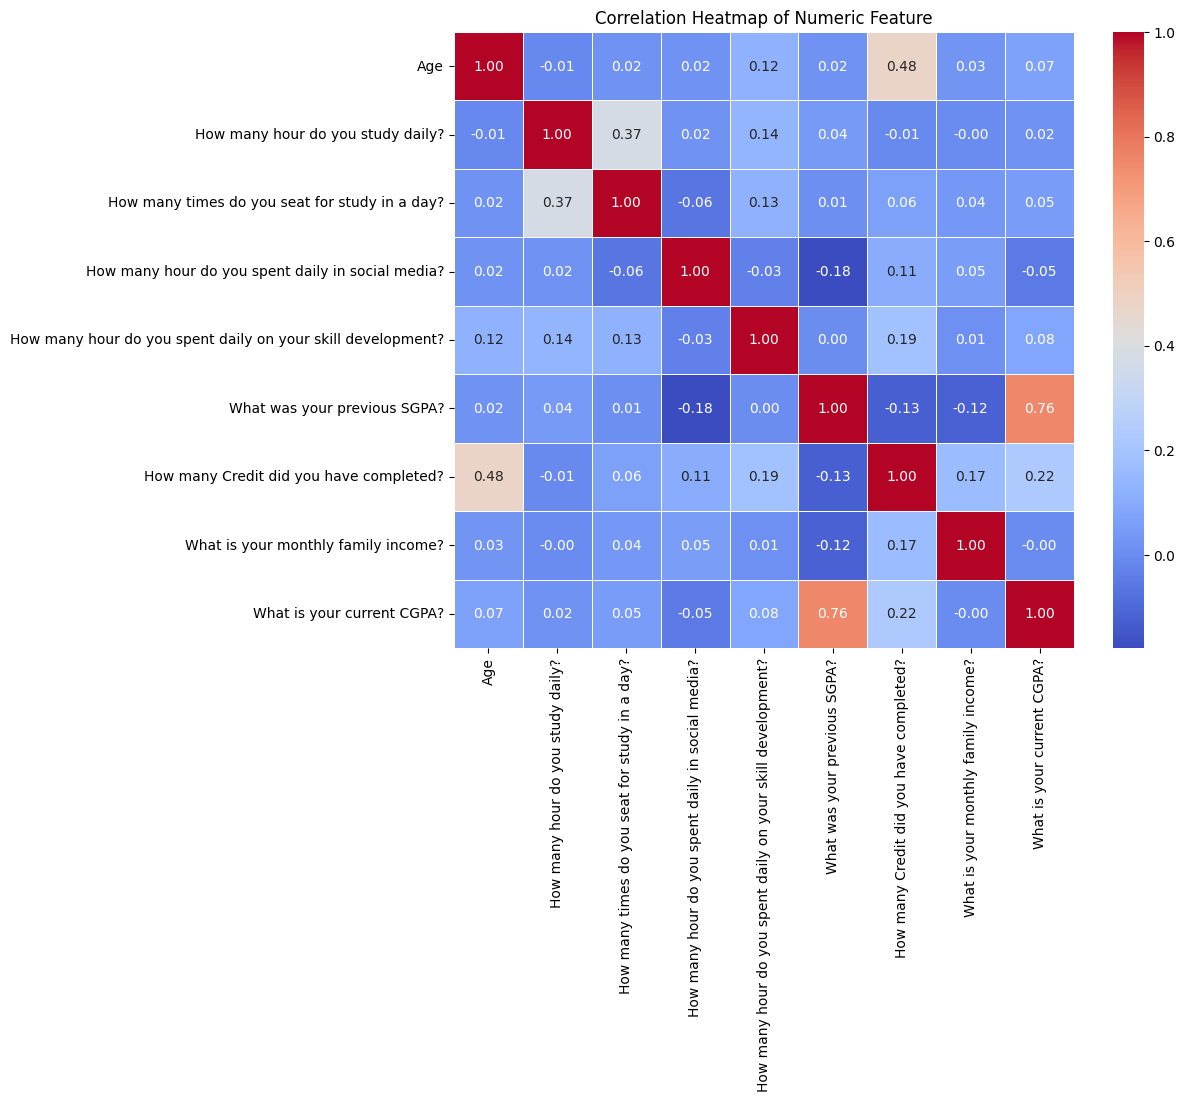

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Feature')
plt.show()

Academic performance is strongly influenced by past academic achievement (Previous SGPA), while lifestyle and behavioral factors such as study hours or skill development show only weak direct correlation with CGPA.

## 6. Modeling Approach

A baseline Linear Regression model was developed to predict students' current CGPA. The model uses academic history, behavioral, and demographic features that would realistically be available before CGPA is determined.


In [34]:
X = df[
    [
        'Age',
        'How many hour do you study daily?',
        'How many times do you seat for study in a day?',
        'How many hour do you spent daily in social media?',
        'How many hour do you spent daily on your skill development?',
        'What was your previous SGPA?',
        'How many Credit did you have completed?',
        'What is your monthly family income?',
        'Gender',
        'Program',
        'What is your preferable learning mode?',
        'Do you have meritorious scholarship ?'
    ]
]

y = df['What is your current CGPA?']


In [35]:
# Encoding Category
X_encoded = pd.get_dummies(X, drop_first=True)

In [36]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

## Linear Regression ##

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 7. Model Evaluation

The model was evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae,rmse,r2

(0.2905121962858105, np.float64(0.35985233903385166), 0.7479395505287036)

## Interpretasi Koefisien ##

In [40]:
coef_df = pd.DataFrame({
    'Feature':X_encoded.columns,
    'Coefficient':model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
5,What was your previous SGPA?,7.010666e-01
2,How many times do you seat for study in a day?,2.411351e-02
8,Gender_Male,2.262291e-02
4,How many hour do you spent daily on your skill...,1.755767e-02
3,How many hour do you spent daily in social media?,1.339257e-02
6,How many Credit did you have completed?,5.540428e-03
9,What is your preferable learning mode?_Online,2.152634e-03
7,What is your monthly family income?,3.003401e-07
1,How many hour do you study daily?,-1.455194e-02
10,Do you have meritorious scholarship ?_Yes,-4.228771e-02


Current CGPA is primarily driven by previous academic performance, while behavioral factors such as study duration, learning mode, and skill development play only minor roles. Interestingly, longer study hours do not necessarily translate into higher academic performance, highlighting the importance of learning efficiency over quantity.